In [1]:
# 基础库
import numpy as np
import pandas as pd

# 基础绘图库
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题，但会自动添加背景灰色网格
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 提高输出效率库
from IPython.core.interactiveshell import InteractiveShell # 实现 notebook 的多行输出
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

In [2]:
df = pd.read_excel('网约车司机单日工作情况.xlsx')
df.head()

司机编号  平均星级   在线时长  完成订单数  订单实际总公里数     车费收入
0    79   5.0  1.729     18     69.94   641.76
1    29   5.0  5.421     18    475.74  1872.96
2   118   5.0  4.438     29    188.87   992.25
3    72   4.9  3.762     21    152.46   793.00
4    67   5.0  5.796     25    262.20  1169.70

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   司机编号      300 non-null    int64  
 1   平均星级      300 non-null    float64
 2   在线时长      300 non-null    float64
 3   完成订单数     300 non-null    int64  
 4   订单实际总公里数  300 non-null    float64
 5   车费收入      300 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 14.2 KB


# 效率最高和最低的司机

In [4]:
df.columns

Index(['司机编号', '平均星级', '在线时长', '完成订单数', '订单实际总公里数', '车费收入'], dtype='object')

In [5]:
# 假设车油耗是百公里8L，当前油价是7.4元/升
oil_price = 8*7.4
df['净收入'] = df['车费收入'] - (df['订单实际总公里数']*oil_price)/100
df['投入产出比'] = df['净收入']/df['在线时长']

print('效率最高的司机：')
df.sort_values(by='投入产出比', ascending=False).head(1)
print('效率最低的司机：')
df.sort_values(by='投入产出比', ascending=False).tail(1)

效率最高的司机：


司机编号  平均星级   在线时长  完成订单数  订单实际总公里数    车费收入        净收入       投入产出比
0    79   5.0  1.729     18     69.94  641.76  600.35552  347.227021

效率最低的司机：


司机编号  平均星级      在线时长  完成订单数  订单实际总公里数   车费收入       净收入     投入产出比
299   232   5.0  14.93328      3      8.68  56.98  51.84144  3.471537

# 单维度分类

In [6]:
# 根据日收入来进行分类，pandas 指定宽度分箱操作
df['日收入层级'] = pd.cut(x=df['净收入'], 
       bins=[0, 75, 200, 350, 500, 1622],  # 分箱断点
       labels=['极少', '少', '中', '较高', '高'])  # 分箱后分类

# 根据在线时长来进行分类
df['在线时长分类'] = pd.cut(x=df['在线时长'], 
                      bins=[0, 4, 8, 12, 16, np.max(df['在线时长'])],
                      labels=['过少', '轻松', '中等', '劳累', '过劳'])

df[['司机编号',  '日收入层级', '在线时长分类']].head()

司机编号 日收入层级 在线时长分类
0    79     高     过少
1    29     高     轻松
2   118     高     轻松
3    72     高     过少
4    67     高     轻松

In [7]:
df['日收入层级'].value_counts(normalize=True)
df['在线时长分类'].value_counts(normalize=True)

高     0.483333
少     0.180000
较高    0.166667
中     0.153333
极少    0.016667
Name: 日收入层级, dtype: float64

过劳    0.303333
劳累    0.266667
中等    0.226667
轻松    0.173333
过少    0.030000
Name: 在线时长分类, dtype: float64

# 两维度分类（矩阵法）

In [8]:
df

司机编号  平均星级      在线时长  完成订单数  订单实际总公里数     车费收入         净收入       投入产出比  \
0      79   5.0   1.72900     18     69.94   641.76   600.35552  347.227021   
1      29   5.0   5.42100     18    475.74  1872.96  1591.32192  293.547670   
2     118   5.0   4.43800     29    188.87   992.25   880.43896  198.386426   
3      72   4.9   3.76200     21    152.46   793.00   702.74368  186.800553   
4      67   5.0   5.79600     25    262.20  1169.70  1014.47760  175.030642   
..    ...   ...       ...    ...       ...      ...         ...         ...   
295   241   4.9  15.26672      5     11.36    91.84    85.11488    5.575191   
296   165   4.9  17.00000      3     18.48    95.40    84.45984    4.968226   
297     3   5.0  18.50500      5     28.50    99.00    82.12800    4.438152   
298   182   5.0  13.87500      5      9.92    72.72    66.84736    4.817828   
299   232   5.0  14.93328      3      8.68    56.98    51.84144    3.471537   

    日收入层级 在线时长分类  
0       高     过少  
1       高     轻松  
2       高     轻松  
3       高     过少  
4       高     轻松  
..    ...    ...  
295     少     劳累  
296     少     过劳  
297     少     过劳  
298    极少     劳累  
299    极少     劳累  

[300 rows x 10 columns]

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, '在线时长')

Text(0, 0.5, '净收入')

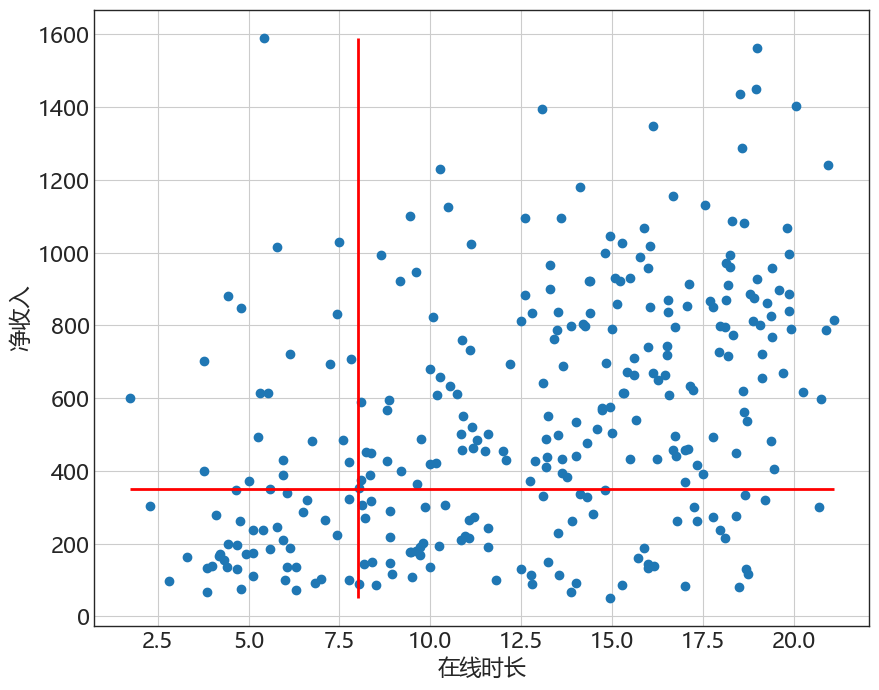

In [9]:
# 将日收入层级和在线时长分类这两个维度，作为矩阵的横轴和纵轴
plt.figure(figsize=(10, 8))
x, y = df['在线时长'], df['净收入']
plt.scatter(x, y)
plt.xlabel('在线时长'); plt.ylabel('净收入')
        
# 添加特定分割线
 ## vlines: vertical 垂直于 x 轴的线，以在线时长=8，即中等为划分标准
plt.vlines(x=8, ymin=y.min(), ymax=y.max(), 
           colors='red', linewidth=2)  
 ## hlines：horizontal 与 x 轴水平的线，以净收入=350，即中等为划分标准
plt.hlines(y=350, xmin=x.min(), xmax=x.max(),
           colors='red', linewidth=2)
plt.grid(True)

## 热力图

In [10]:
df.columns

Index(['司机编号', '平均星级', '在线时长', '完成订单数', '订单实际总公里数', '车费收入', '净收入', '投入产出比',
       '日收入层级', '在线时长分类'],
      dtype='object')

<Figure size 480x320 with 0 Axes>

<AxesSubplot:>

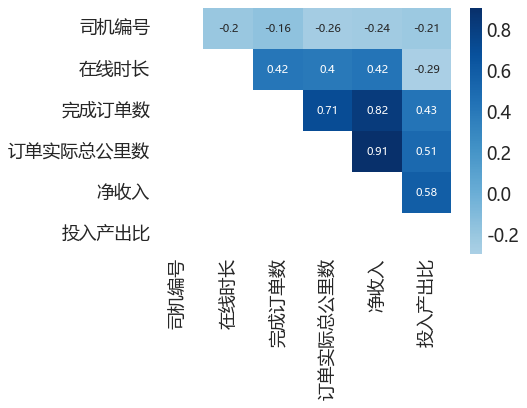

In [11]:
data = df.drop(columns=['平均星级', '车费收入'])

mask = np.zeros_like(data.corr())
mask[np.tril_indices_from(mask)] = True
plt.figure(figsize=(6,4), dpi= 80)

sns.heatmap(data=data.corr(), 
            xticklabels=data.corr().columns, 
            yticklabels=data.corr().columns, 
                center=0, annot=True, mask=mask, cmap='Blues')

In [12]:
round(df[['在线时长', '完成订单数']].describe(), 2)

在线时长   完成订单数
count  300.00  300.00
mean    12.65   15.26
std      4.88    8.73
min      1.73    2.00
25%      8.76    8.00
50%     13.35   14.00
75%     16.73   21.00
max     21.11   43.00

In [13]:
df['订单数分类'] = pd.cut(x=df['完成订单数'], 
                        bins=[1, 5, 10, 15, 20, 26, 43],
                        labels=['1-5', '6-10', '11-15', '16-20', '21-25', '26+'])

df['在线时长分类'] = pd.cut(x=df['在线时长'],
                          bins=[0, 4, 8, 12, 16, 24],
                          labels=['0-4', '5-8', '9-12', '13-16', '17+'])

df[['司机编号', '在线时长分类', '订单数分类']].sample(3)

司机编号 在线时长分类 订单数分类
99   135    17+   26+
16    81   9-12   26+
55    71    5-8  6-10

In [14]:
# 两个分类变量：列联表分析
pd.crosstab(index=df['订单数分类'], columns=df['在线时长分类'],
            normalize='columns').applymap(lambda x: str(round(x*100))+'%')
            # 每一列总比例记为 1，normalize='columns'

在线时长分类  0-4  5-8 9-12 13-16  17+
订单数分类                           
1-5     56%  33%  15%   12%   4%
6-10    11%  37%  24%   16%  14%
11-15   11%  10%  29%   18%  16%
16-20   11%  12%  19%   22%  19%
21-25   11%   8%   7%   22%  24%
26+      0%   2%   6%    9%  22%

## 四大类

In [15]:
## 正常的两种情况
# 在线时间多，订单也多：在多订多
time_high_order_high = df.query('在线时长>8 and 完成订单数>15')
# 在线时间少，订单也少：在少订少
time_low_order_low = df.query('在线时长<8 and 完成订单数<15')

## 值得注意的两种情况
# 在线时间少 但 订单多：在少订多
time_low_order_high = df.query('在线时长<8 and 完成订单数>15')
# 在线时间多 但 订单少：在多订少
time_high_order_low = df.query('在线时长>8 and 完成订单数<15')


# 人数占比
data = {
    '类型': ['在多订多', '在少订少', '在少订多', '在多订少'],
    '人数占比': [
    ## 在多订多
    str(round(len(time_high_order_high)/len(df), 2)*100)+'%',
    ## 在少订少
    str(round(len(time_low_order_low)/len(df), 2)*100)+'%',
    ## 在少订多
    str(round(len(time_low_order_high)/len(df), 2)*100)+'%',
    ## 在多订少
    str(round(len(time_high_order_low)/len(df), 2)*100)+'%'
    ] }

pd.DataFrame(data=data)

类型   人数占比
0  在多订多  41.0%
1  在少订少  16.0%
2  在少订多   4.0%
3  在多订少  37.0%

### 引入里程数这个指标

In [16]:
# 在线少、订单多
time_low_order_high.eval("今日订单按理应达到的总公里数 = 完成订单数*9", inplace=True)

# 在线多、订单少
time_high_order_low.eval("今日订单按理应达到的总公里数 = 完成订单数*9", inplace=True)

# 在线短、订单多的分类中，里程少的
time_low_order_high_km_low = \
    time_low_order_high.query("订单实际总公里数 < 今日订单按理应达到的总公里数")

# 在线短、订单多的分类中，里程多的
time_low_order_high_km_high = \
    time_low_order_high.query("订单实际总公里数 > 今日订单按理应达到的总公里数")

# 在线长、订单少的分类中，里程少的
time_high_order_low_km_low = \
    time_high_order_low.query("订单实际总公里数 < 今日订单按理应达到的总公里数")

# 在线长、订单少的分类中，里程多的
time_high_order_low_km_high = \
    time_high_order_low.query("订单实际总公里数 > 今日订单按理应达到的总公里数")

In [17]:
data = {
    '类型': ['在多订多', '在少订少', 
           '在少订多', '  在少订多--程少', '  在少订多--程多',
           '在多订少', '  在多订少--程少', '  在多订少--程多'],
    '人数占比': [
    # 在多订多
    str(round(len(time_high_order_high)/len(df), 2)*100)+'%',
    # 在少订少
    str(round(len(time_low_order_low)/len(df), 2)*100)+'%',
        
    # 在少订多
    str(round(len(time_low_order_high)/len(df), 2)*100)+'%',
    ## 在少订多--程少
    str(round(len(time_low_order_high_km_low)/len(time_low_order_high), 2)*100)+'%',
    ## 在少订多--程多
    str(round(len(time_low_order_high_km_high)/len(time_low_order_high), 2)*100)+'%',
        
    # 在多订少
    str(round(len(time_high_order_low)/len(df), 2)*100)+'%',
    ## 在多订少--程少
    str(round(len(time_high_order_low_km_low)/len(time_high_order_low), 2)*100)+'%',
    ## 在多订少--程多
    str(round(len(time_high_order_low_km_high)/len(time_high_order_low), 2)*100)+'%'
    ] }

result = pd.DataFrame(data=data)
result

类型   人数占比
0        在多订多  41.0%
1        在少订少  16.0%
2        在少订多   4.0%
3    在少订多--程少  62.0%
4    在少订多--程多  38.0%
5        在多订少  37.0%
6    在多订少--程少  60.0%
7    在多订少--程多  40.0%